In [1]:
import pandas as pd

#nltk packages
import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

#tf-idf packages
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

#sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
test = pd.read_csv("Data\Sample\sampledDataset_testing.csv")
test['text'] = test['text'].astype(str)

train = pd.read_csv("Data\Sample\sampledDataset_training.csv")
train['text'] = train['text'].astype(str)

## Basic Exploratory Data Analysis

In [3]:
print(test.shape)
print(train.shape)

(50, 4)
(50, 4)


In [4]:
test.head()

,line,author,time,text
0,1,8bf9c378ec2a475392b4267ae7768f13,17:32,hi
1,1,eda70375307c707da829326edc18816f,07:19,Heyy
2,59,24527f8ca0a73da6f9ae19e7b7dd19b4,11:55,okay :)
3,28,5fe72667d76d0f68d46390d03c940350,02:07,yay me
4,4,a11aabeeceeae6b8cb5d12ea06b56554,14:55,What's an iteration?


In [5]:
train.head()

,line,author,time,text
0,27,4dd217ba7542bb00a127f682e2c3ad27,13:17,7a57f5bab20dcaf42d8916dd02e7fac8: are you goin...
1,18,1a8584f0c647c17aae7f5aca0ae61686,00:08,I need colors to create pens to drawrectangle ...
2,26,b25b6b77a0087ff8385941e5545d32ea,00:54,a131216c7af242e66537a58b4ca7c9f9: &quot;When y...
3,7,4f5d64b5e9531fd97985f94cafe5cd15,02:01,first word yea NoiseEee's got it
4,2,6bf6443c8d8d3dbd2e8798cefc00d963,19:05,[http://twitter.com/reiver] ... I wonder if th...


In [6]:
test.duplicated().sum()

0

In [7]:
train.duplicated().sum()

0

## Data Preprocessing

In [8]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# Identify the column(s) containing the text data
text_columns = [col for col in test.columns if 'text' in col.lower()]

In [10]:
text_columns = [col for col in train.columns if 'text' in col.lower()]

In [11]:

if not text_columns:
    print("Error: No 'text' column found in the input data.")
    print("Please check the column names and update the code accordingly.")
    exit()
elif len(text_columns) > 1:
    print("Warning: Multiple 'text' columns found in the input data.")
    print("Using the first 'text' column: ", text_columns[0])
    text_column = text_columns[0]
else:
    text_column = text_columns[0]


In [12]:
def preprocess(text):
    if pd.isnull(text) or text.strip() == "":
        return ""
    
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)
    text = re.sub(r'\[.*?\]', '', str(text))  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    return ' '.join(text)

In [13]:
cleaned_texts = [preprocess(row[text_column]) for _, row in test.iterrows()]
test['cleaned'] = cleaned_texts

print(test.head())

   line                            author   time                  text cleaned
0     1  8bf9c378ec2a475392b4267ae7768f13  17:32                    hi        
1     1  eda70375307c707da829326edc18816f  07:19                  Heyy        
2    59  24527f8ca0a73da6f9ae19e7b7dd19b4  11:55               okay :)        
3    28  5fe72667d76d0f68d46390d03c940350  02:07                yay me        
4     4  a11aabeeceeae6b8cb5d12ea06b56554  14:55  What's an iteration?        


In [14]:
cleaned_texts = [preprocess(row[text_column]) for _, row in train.iterrows()]
train['cleaned'] = cleaned_texts

print(train.head())

   line                            author   time  \
0    27  4dd217ba7542bb00a127f682e2c3ad27  13:17   
1    18  1a8584f0c647c17aae7f5aca0ae61686  00:08   
2    26  b25b6b77a0087ff8385941e5545d32ea  00:54   
3     7  4f5d64b5e9531fd97985f94cafe5cd15  02:01   
4     2  6bf6443c8d8d3dbd2e8798cefc00d963  19:05   

                                                text  \
0  7a57f5bab20dcaf42d8916dd02e7fac8: are you goin...   
1  I need colors to create pens to drawrectangle ...   
2  a131216c7af242e66537a58b4ca7c9f9: &quot;When y...   
3                   first word yea NoiseEee's got it   
4  [http://twitter.com/reiver] ... I wonder if th...   

                                             cleaned  
0                                                     
1                                                     
2                                                     
3                                                     
4      w o n d e r   a u t h o r s   w o u l d   ...  


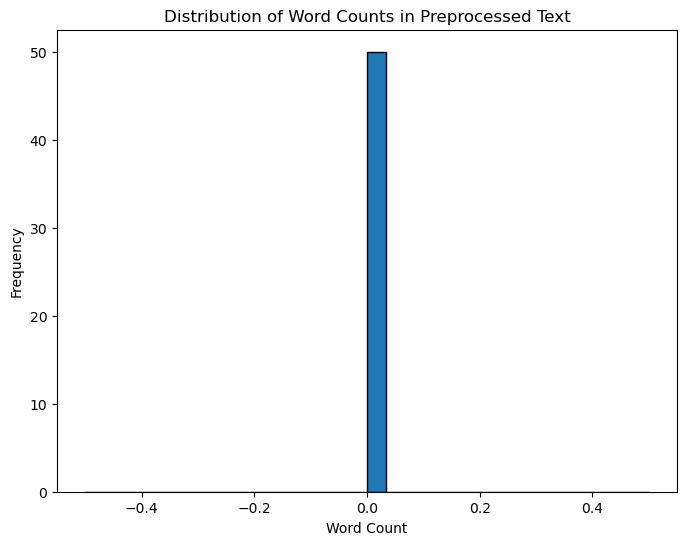

In [15]:
word_counts = [len(text.split()) for text in test['cleaned']]

# Create a histogram to visualize the word count distribution
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=30, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Preprocessed Text')
plt.show()

In [16]:
# Assuming you have a 'category' column in your DataFrame
categories = test['category'].unique()

# Calculate the average word count for each category
avg_word_counts = [test.loc[test['category'] == cat, 'cleaned'].apply(lambda x: len(x.split())).mean() for cat in categories]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, avg_word_counts)
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.title('Average Word Count by Category')
plt.xticks(rotation=90)
plt.show()

KeyError: 'category'